In [1]:
import cv2
import numpy as np
import sys
import torch
from src.fusionModel.nn.segment import SegmentFocus
torch.set_float32_matmul_precision('medium')
import matplotlib.pyplot as plt
from config.data_pipeline_config import get_test_pipeline_config
from utils.helpers import plot
config = get_test_pipeline_config()

/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


(tensor([[[[-0.6597, -0.7566,  0.9442,  ...,  0.4723, -0.1047, -0.7072],
          [-0.3531, -0.5703, -0.3069,  ..., -0.1986,  0.2682, -0.1632],
          [ 0.5177,  0.3421, -0.5253,  ...,  0.0412, -0.1726,  0.1394],
          ...,
          [ 0.2773,  0.3411,  0.7261,  ...,  0.8910, -0.1834, -0.7700],
          [ 0.0728,  0.0830, -0.2289,  ..., -0.0306,  0.1833,  0.4643],
          [-0.8235, -0.8028, -0.4566,  ..., -0.2914,  1.2031, -0.1313]],

         [[-1.2010,  1.5413,  0.6791,  ...,  0.6850,  0.1964, -0.1996],
          [ 0.4193, -0.2374,  0.3040,  ...,  0.9798,  0.0569, -0.2906],
          [ 0.1237,  0.8075,  0.2012,  ...,  0.0608,  0.8174,  0.1843],
          ...,
          [ 0.0992,  0.2057, -0.0589,  ...,  0.1541,  0.9855,  0.5906],
          [ 0.1631,  0.2596, -0.7361,  ..., -0.0672, -0.3602, -1.0571],
          [ 1.0817, -0.0732, -1.1574,  ...,  0.2043,  0.5543, -0.6083]],

         [[ 0.8161, -0.0766,  0.0430,  ..., -0.3541, -0.3114, -0.1997],
          [-0.1709, -0.2601, 

In [2]:
config.MEAN[0]/255

0.31997647058823525

In [3]:
import cv2
import torch
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

MEAN = list(map(lambda x: x/255, config.MEAN))
STD = list(map(lambda x: x/255, config.STD))
# Open the image using PIL
image1 = Image.open('/home/anirudhan/project/image-fusion/data/valid/RealMFF/source_1/019_A.png')
image2 = Image.open('/home/anirudhan/project/image-fusion/data/valid/RealMFF/source_2/019_B.png')
# Define the transformations
transform = transforms.Compose([
    # transforms.Resize((128, 12)),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD)
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformations to the image
image1 = transform(image1).unsqueeze(0)
image2 = transform(image2).unsqueeze(0)
gt_image = image1
gt_mask = torch.ones_like(gt_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


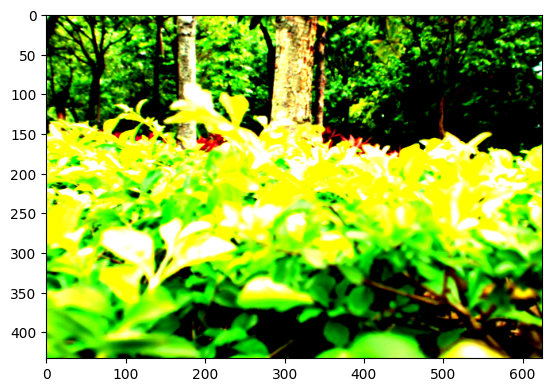

In [4]:
plt.imshow(image2[0].permute(1,2,0).numpy())

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SegmentFocus([16, 16, 32, 32], 16)
model = model.to(device)
dummy_output = model(image1.to(device), image2.to(device), gt_image.to(device), gt_mask.to(device))
model = torch.compile(model)
model.load_state_dict(torch.load('/home/anirudhan/project/image-fusion/results/checkpoints/model_98.pth')['model_state_dict'])

/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [ ]:
model_jit = torch.jit.export(model)
model_jit(image1.to(device), image2.to(device), gt_image.to(device), gt_mask.to(device))

In [1]:
d = torch.load('/home/anirudhan/project/image-fusion/results/checkpoints/model_98.pth')['model_state_dict']

NameError: name 'torch' is not defined

In [11]:
d

OrderedDict([('_orig_mod.xfm.h0_col',
              tensor([[[[0.7071],
                        [0.7071]]]], device='cuda:0')),
             ('_orig_mod.xfm.h1_col',
              tensor([[[[ 0.7071],
                        [-0.7071]]]], device='cuda:0')),
             ('_orig_mod.xfm.h0_row',
              tensor([[[[0.7071, 0.7071]]]], device='cuda:0')),
             ('_orig_mod.xfm.h1_row',
              tensor([[[[ 0.7071, -0.7071]]]], device='cuda:0')),
             ('_orig_mod.initial_feature_extractor.input_conv_block.0.weight',
              tensor([[[[-6.3348e-02,  1.0583e-01, -1.3307e-01],
                        [ 2.7443e-02,  9.4493e-02,  5.0409e-02],
                        [ 7.7261e-02, -1.5844e-02, -7.5446e-02]]],
              
              
                      [[[-7.3330e-02,  1.0384e-01,  1.2050e-01],
                        [-1.6616e-02, -5.0774e-02, -1.7712e-02],
                        [-1.0496e-02,  9.9094e-02, -1.0920e-01]]],
              
              
   

In [17]:
params = []
for p in model.parameters():
    try:
        params.append(p.numel())
    except:
        print('afsdfgd'*10)
sum(params)

afsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgd
afsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgd
afsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgd
afsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgdafsdfgd


823190

In [14]:
dummy_output = model(image1.to(device), image2.to(device), gt_image.to(device), gt_mask.to(device))
pytorch_total_params = sum(p.numel() for p in model(image1.to(device), image2.to(device), gt_image.to(device), gt_mask.to(device)).parameters())
pytorch_total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('total_parms:', pytorch_total_params, 'total_trainable_parms:', pytorch_total_trainable_params)

OutOfMemoryError: CUDA out of memory. Tried to allocate 18.00 MiB. GPU 0 has a total capacity of 11.76 GiB of which 2.31 MiB is free. Including non-PyTorch memory, this process has 11.75 GiB memory in use. Of the allocated memory 11.08 GiB is allocated by PyTorch, and 544.68 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [7]:
model = model.eval()
output, output_mask = model(image1.to(device), image2.to(device), gt_image.to(device), gt_mask.to(device))

In [8]:
output = output.squeeze().detach().cpu().permute(1, 2, 0).numpy()
output_mask = output_mask.squeeze().detach().cpu().permute(1, 2, 0).numpy()

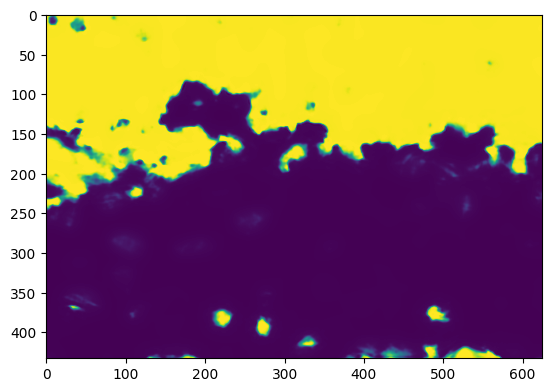

In [13]:
plt.imshow(output_mask[:,:,2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


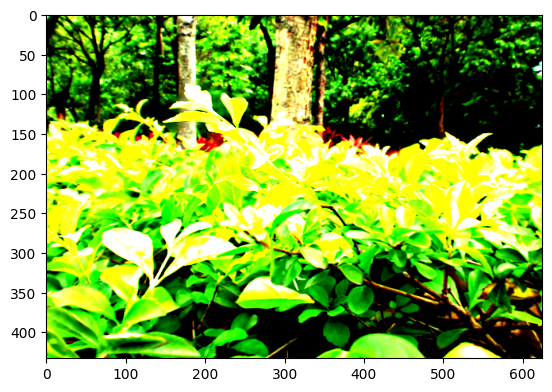

In [10]:
plt.imshow(output)

In [11]:
from src.dataPipeline.test import MFI_Dataset 
from torch.utils.data import DataLoader

dataset = MFI_Dataset(
    '/home/anirudhan/project/image-fusion/data/valid/RealMFF/',
    'train',
    transform,
    resize=None,
    imgSzie=None,
    )
test_dataloader = DataLoader(dataset, batch_size=1)
d = next(iter(test_dataloader))

2024-04-18 03:34:00.465954: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using TensorFlow backend.
/home/anirudhan/miniconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


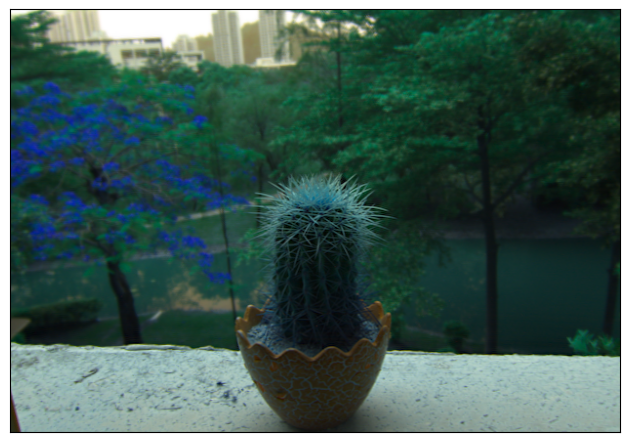

In [12]:
plot(d['source_1'])

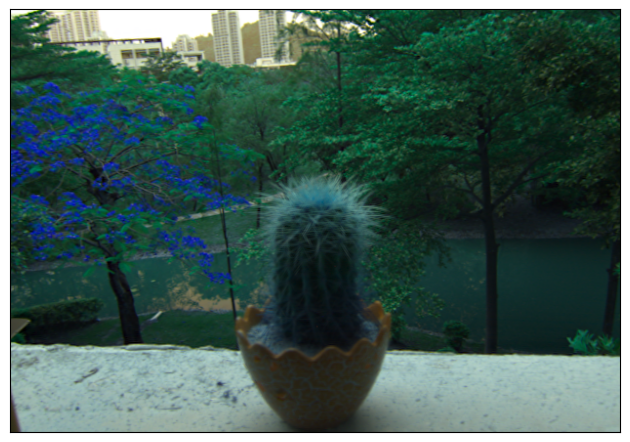

In [13]:
plot(d['source_2'])

In [26]:
from skimage.metrics import structural_similarity, normalized_mutual_information, variation_of_information
import numpy as np
import matplotlib.pyplot as plt
from src.dataPipeline.train_val import create_split
from src.dataPipeline.test import MFI_Dataset 
from torch.utils.data import DataLoader

output_dir = '/home/anirudhan/project/image-fusion/results/valid/Lytro/'
dataset = MFI_Dataset(
    '/home/anirudhan/project/image-fusion/data/valid/MFI-WHU/MFI-WHU',
    'valid',
    transform,
    resize=None,
    imgSzie=None,
    )
test_dataloader = DataLoader(dataset, batch_size=1, num_workers=16, pin_memory=True,)

def test_step(model, dataset):
    model = model.eval()
    with torch.no_grad():
        for i, image in enumerate(dataset):  # Iterate through the dataset
            
            prediction, mask = model(image['source_1'].to(device), 
                                     image['source_2'].to(device), 
                                     image['source_1'].to(device), 
                                     gt_mask = torch.ones_like( image['source_1'].to(device)))
            prediction = prediction.permute(0, 2, 3, 1).cpu().detach().numpy()
            save_plot(prediction[0], i)
    
def denormalize(image):
    image = image * config.STD + config.MEAN
    return image

def denormalize_images(func):
    """Decorator to denormalize images before passing them to a function."""

    def wrapper(*args, **kwargs):
        """Wrapper function to denormalize images."""
        denormalized_args = []
        for arg in args:
            if isinstance(arg, np.ndarray) and arg.ndim == 3:  # Check for images
                denormalized_args.append(denormalize(arg))
            else:
                denormalized_args.append(arg)
        return func(*denormalized_args, **kwargs)

    return wrapper

@denormalize_images
def save_plot(output, index):
    output = denormalize_val_image(output)
    plt.imshow(output)

def denormalize_val_image(image, mean=config.MEAN, std=config.STD):
  """
  Preprocesses an image by denormalizing, clipping, and converting to uint8.

  Args:
      image: A Jax tensor representing the normalized image.
      mean: A float value representing the mean used for normalization.
      std: A float value representing the standard deviation used for normalization.

  Returns:
      A Jax tensor representing the preprocessed image in uint8 format.
  """
  # Combine denormalization and clipping in a single step
  image = np.nan_to_num(image, nan=0)
#   print((image * std + mean).clip(min=0.0, max=255.0).astype(np.uint8))
  return (image * std + mean).clip(min=0.0, max=255.0).astype(np.uint8)


[2024-04-18 10:54:53,752] torch._dynamo.convert_frame: [WARNING] torch._dynamo hit config.cache_size_limit (8)
[2024-04-18 10:54:53,752] torch._dynamo.convert_frame: [WARNING]    function: 'resume_in_forward' (/home/anirudhan/project/image-fusion/src/fusionModel/nn/segment.py:314)
[2024-04-18 10:54:53,752] torch._dynamo.convert_frame: [WARNING]    last reason: tensor 'L['dwt_image1'][0]' stride mismatch at index 1. expected 202800, actual 204480
[2024-04-18 10:54:53,752] torch._dynamo.convert_frame: [WARNING] To log all recompilation reasons, use TORCH_LOGS="recompiles".
[2024-04-18 10:54:53,752] torch._dynamo.convert_frame: [WARNING] To diagnose recompilation issues, see https://pytorch.org/docs/master/compile/troubleshooting.html.
[2024-04-18 10:57:41,690] torch._dynamo.convert_frame: [WARNING] torch._dynamo hit config.cache_size_limit (8)
[2024-04-18 10:57:41,690] torch._dynamo.convert_frame: [WARNING]    function: 'forward' (/home/anirudhan/project/image-fusion/src/fusionModel/nn/s

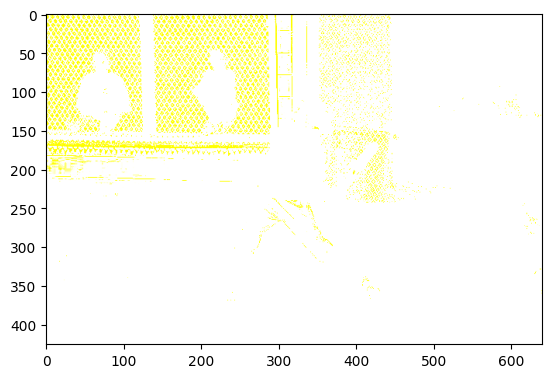

In [27]:
test_step(model, test_dataloader)

In [28]:
from skimage.metrics import structural_similarity, normalized_mutual_information, variation_of_information
import numpy as np
import matplotlib.pyplot as plt
from src.dataPipeline.train_val import create_split
from src.dataPipeline.test import MFI_Dataset 
from torch.utils.data import DataLoader

transform = transforms.Compose([
    # transforms.Resize((128, 12)),
    # transforms.ToTensor(),
    # transforms.Normalize(mean=MEAN, std=STD)
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = MFI_Dataset(
    '/home/anirudhan/project/image-fusion/data/valid/MFI-WHU/MFI-WHU',
    'train',
    transform,
    resize=None,
    imgSzie=None,
    )

test_dataloader = DataLoader(dataset, batch_size=1, num_workers=16, pin_memory=True,)

def test_step(model, dataset):
    test_loss = {'ssim':[], 'nmi':[], 'vi':[]}
    model = model.eval()
    with torch.no_grad():
        for i, image in enumerate(dataset):  # Iterate through the dataset
            
            prediction, mask = model(image['source_1'].to(device), 
                                     image['source_2'].to(device), 
                                     image['source_1'].to(device), 
                                     gt_mask = torch.ones_like( image['source_1'].to(device)))
            prediction = prediction.permute(0, 2, 3, 1).cpu().detach().numpy()
            mask = mask.permute(0, 2, 3, 1).cpu().detach().numpy()

            metric1 = ssim_metric(denormalize_val_image(prediction), denormalize_val_image(image['full_clear'].permute(0, 2, 3, 1).cpu().detach().numpy()))
            metric2 = nmi_metric(denormalize_val_image(prediction), denormalize_val_image(image['full_clear'].permute(0, 2, 3, 1).cpu().detach().numpy()))
            metric3 = vi_metric(denormalize_val_image(prediction), denormalize_val_image(image['full_clear'].permute(0, 2, 3, 1).cpu().detach().numpy()))
            
            #    loss = charbonnier_loss(prediction, image['Fusion']) + config.a*wavelet_loss(prdicted_dwt, image['Fusion'])
            test_loss['ssim'].append(metric1)
            test_loss['nmi'].append(metric2)
            test_loss['vi'].append(metric3)
            if i == 70:
                    image = {key: value.permute(0, 2, 3, 1).numpy() for key, value in image.items()}
                    save_plot(image['source_1'][0], image['source_2'][0], mask[0], prediction[0], image['full_clear'][0])
    return {key: np.mean(loss) for key, loss in test_loss.items()}

def nmi_metric(image1, image2):
    assert image1.shape == image2.shape
    n = image1.shape[0]
    loss = []
    for i in range(n):
        loss.append(normalized_mutual_information(image1[i], image2[i]))
    return np.mean(loss)

def ssim_metric(image1, image2):
    assert image1.shape == image2.shape
    n = image1.shape[0]
    loss = []
    for i in range(n):
        loss.append(structural_similarity(image1[i], image2[i],
                    channel_axis=2))
    return np.mean(loss)
    
def vi_metric(image1, image2):
    assert image1.shape == image2.shape
    n = image1.shape[0]
    loss = []
    for i in range(n):
        loss.append(variation_of_information(image1[i], image2[i],
                  ))
    return np.mean(loss)
    
def denormalize(image):
    image = image * config.STD + config.MEAN
    return image

def denormalize_images(func):
    """Decorator to denormalize images before passing them to a function."""

    def wrapper(*args, **kwargs):
        """Wrapper function to denormalize images."""
        denormalized_args = []
        for arg in args:
            if isinstance(arg, np.ndarray) and arg.ndim == 3:  # Check for images
                denormalized_args.append(denormalize(arg))
            else:
                denormalized_args.append(arg)
        return func(*denormalized_args, **kwargs)

    return wrapper

@denormalize_images
def save_plot(image1, image2, mask, prediction, ground_truth):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust figsize for better layout

    # Image 1 (top left)
    axes[0, 0].imshow(image1.astype(np.uint8))
    axes[0, 0].set_title("Image 1")

    # Empty space (top right)
    axes[0, 1].axis('off')  # Turn off axes for empty space

    # Image 2 (top center)
    axes[0, 2].imshow(image2.astype(np.uint8))
    axes[0, 2].set_title("Image 2")

    # Mask (bottom left)
    axes[1, 0].imshow(prediction.astype(np.uint8))
    axes[1, 0].set_title("prediction")

    # Prediction (bottom center)
    axes[1, 1].imshow(mask.astype(np.uint8))
    axes[1, 1].set_title("Mask")

    # Ground Truth (bottom right)
    axes[1, 2].imshow(ground_truth.astype(np.uint8))
    axes[1, 2].set_title("Ground Truth")

    plt.tight_layout()
    plt.savefig("validation_plot.png")
    plt.close()  # Close the plot to avoid memory issues


def denormalize_val_image(image, mean=config.MEAN, std=config.STD):
  """
  Preprocesses an image by denormalizing, clipping, and converting to uint8.

  Args:
      image: A Jax tensor representing the normalized image.
      mean: A float value representing the mean used for normalization.
      std: A float value representing the standard deviation used for normalization.

  Returns:
      A Jax tensor representing the preprocessed image in uint8 format.
  """
  # Combine denormalization and clipping in a single step
  image = np.nan_to_num(image, nan=0)
#   print((image * std + mean).clip(min=0.0, max=255.0).astype(np.uint8))
  return (image * std + mean).clip(min=0.0, max=255.0).astype(np.uint8)


In [29]:
test_loss = test_step(model, test_dataloader)
print(f"Test metrics: {test_loss}")

Test metrics: {'ssim': 0.994839534170247, 'nmi': 1.7446122303517688, 'vi': 0.8901547965401463}


In [ ]:
Test metrics: {'ssim': 0.985261081292385, 'nmi': 1.5136183075447671, 'vi': 2.4676314877958294} : with diffusion gt image
Test metrics: {'ssim': 0.9851560948272851, 'nmi': 1.5129633339501316, 'vi': 2.4716085234459233}